In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
#from torchsummary import summary

#-------------------------------
# Change the name to create or load the data and models
path = os.getcwd()
folder_data = r'Data\data_mlsp_semi'
#-------------------------------


## Read data

In [2]:
x_list = []
y_list = []

for img in os.listdir(os.path.join(path, folder_data)):
    if img.startswith('x'):
        x_list.append(plt.imread(os.path.join(path, folder_data, img)))
    if img.startswith('y') and not img.endswith('npy'):
        y = plt.imread(os.path.join(path, folder_data, img))
        y_list.append(y)
# Load the created data 
y_list_40 = np.load(os.path.join(path, folder_data, 'y_miss_40.npy'))
y_list_60 = np.load(os.path.join(path, folder_data, 'y_miss_60.npy'))
y_list_80 = np.load(os.path.join(path, folder_data, 'y_miss_80.npy'))
y_list_100 = np.load(os.path.join(path, folder_data, 'y_miss_100.npy'))

In [3]:

# fig = plt.figure(figsize=(20, 30))  
# rows = len(x_list)
# columns = 6
# m, n = x_list[0].shape


# for i, (x,y, y1,y2,y3, y4) in enumerate(zip(x_list, y_list, y_list_40, y_list_60, y_list_80, y_list_100)):
#     fig.add_subplot(rows, columns, columns*i+1)
#     x[m-1, n-1] = -1
#     plt.imshow(x, cmap='gray')
#     plt.title('Image  idex {}'.format(i))
#     #plt.axis('off')
#     fig.add_subplot(rows, columns, columns*i+2)
#     y[m-1, n-1] = -1
#     plt.imshow(y, cmap='gray')
#     #plt.axis('off')
#     fig.add_subplot(rows, columns, columns*i+3)
#     plt.imshow(y1, cmap='gray')
#     #plt.axis('off')
#     fig.add_subplot(rows, columns, columns*i+4)
#     plt.imshow(y2, cmap='gray')
#     #plt.axis('off')
#     fig.add_subplot(rows, columns, columns*i+5)
#     plt.imshow(y3, cmap='gray')
#     #plt.axis('off')
#     fig.add_subplot(rows, columns, columns*i+6)
#     plt.imshow(y4, cmap='gray')



## Data

In [4]:
#--------------------------------------------
# 0: Vaquita girada
# 1: Cow
# 2: Human 
# 3: Horse
# 4: Camel
# 5: Dog1
# 6: Dog2
idx  = 1 # Id image
p = 0.4 # percentage of missing labels
names = ['bull', 'cow', 'human', 'horse', 'camel', 'dog1', 'dog2']
name_image = names[idx]+str(int(p*100))
#--------------------------------------------
if torch.cuda.is_available():  
    device = "cuda:0" 
else:  
    device = "cpu"  
print(device)


cuda:0


In [5]:
m, n = x_list[idx].shape
x1  = x_list[idx].reshape(m*n, 1)

if p == 0.4:
    y1 = y_list_40[idx].reshape(m*n, 1)
elif p == 0.6:
    y1 = y_list_60[idx].reshape(m*n, 1)
elif p == 0.8:
    y1 = y_list_80[idx].reshape(m*n, 1)
elif p == 1:
    y1 = y_list_100[idx].reshape(m*n, 1)
#--------------------------------------------
x = torch.tensor(x1, dtype=torch.float32)
y = torch.tensor(y1, dtype=torch.float32)
x = x.to(device)
y = y.to(device)


## Functions and models

In [6]:
from models.SVRNN import SVRNN
from models.SVRNN_2 import SVRNN_2
from models.TMM import TMM
from utils.training import final_model, run_model_seq

## Results

In [6]:
x_dim = 1
y_dim = 1
# Dimension of latent variables
z_dim = 50#1
h_dim = 30#20
settings = "_1" # change it every time you have a new setting for the same image starts by ""
num_neurons = h_dim
# Model settings
learning_rate = 0.005
weight_decay_ = 1e-4
n_epochs = 20
clip = 10
# Manual seed
seed = 123
torch.manual_seed(seed)
# Print settings
print_every = 1


In [7]:
model = SVRNN_2(x_dim, z_dim, h_dim, y_dim, num_neurons, device)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
#print(summary(model))

In [8]:
#--------------------------------------------
# Save models
save_every = 2
# general_path = r'C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models' 
general_path = r"C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models"
data = model.__class__.__name__.casefold()+'_'+name_image+settings
path_save = os.path.join(general_path, data)
if not os.path.exists(path_save):
    os.makedirs(path_save)
print(f'Actual path to save our models for {data} is {path_save} ')


Actual path to save our models for svrnn_2_cow40_1 is C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\svrnn_2_cow40_1 


In [27]:
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every)

The model is saved in this path C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\svrnn_2_cow40_1\svrnn_2


C:\Users\katyt\Google Drive\PhD\Simulations_semi_super\utils\training.py:26: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: 138296.656250 	 Loss Unlabeled: 72492.882812
Loss Labeled: 79683.617188 	 Loss Unlabeled: 34526.605469
Loss Labeled: 44212.039062 	 Loss Unlabeled: 11929.713867
Loss Labeled: 20284.957031 	 Loss Unlabeled: -3448.621094
Loss Labeled: 3345.421875 	 Loss Unlabeled: -14377.307617
Loss Labeled: -8807.890625 	 Loss Unlabeled: -22254.128906
Loss Labeled: -17770.101562 	 Loss Unlabeled: -28111.701172
Loss Labeled: -25590.595703 	 Loss Unlabeled: -32954.074219
Loss Labeled: -33496.046875 	 Loss Unlabeled: -37784.332031
Loss Labeled: -42237.085938 	 Loss Unlabeled: -42818.136719
Loss Labeled: -51200.839844 	 Loss Unlabeled: -48542.324219
Loss Labeled: -56494.242188 	 Loss Unlabeled: -51975.511719
Loss Labeled: -52282.015625 	 Loss Unlabeled: -49465.828125
Loss Labeled: -41128.726562 	 Loss Unlabeled: -41228.597656
Loss Labeled: -7730.113281 	 Loss Unlabeled: -19695.542969
Loss Labeled: 345.304688 	 Loss Unlabeled: -12646.549805
Loss Labeled: -27343.177734 	 Loss Unlabeled: -32122.1

In [12]:
# #-----------------------------------------------------
model = SVRNN_2(x_dim, z_dim, h_dim, y_dim, num_neurons, device)
model.to(device)
epoch_init = 60
n_epochs = 100
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
# #-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save)
loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)

Actual  path for to initialize our models:  C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\svrnn_2_cow40_1
C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\svrnn_2_cow40_1\svrnn_2_state_60.pth
Initialization of the SVRNN_2 model  at epoch 60
loss: -150430.265625 and epoch: 60
The model is saved in this path C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\svrnn_2_cow40_1\svrnn_2


C:\Users\katyt\Google Drive\PhD\Simulations_semi_super\utils\training.py:27: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  nn.utils.clip_grad_norm(model.parameters(), clip)


Loss Labeled: -84363.250000 	 Loss Unlabeled: -62055.906250


KeyboardInterrupt: 

In [10]:
y_ = model.sample(x,y)

In [11]:
from sklearn.metrics import accuracy_score
y_pred = y_[np.where(y1 == -1)].detach().cpu().numpy()
y_label = y_list[idx].reshape(m*n, 1)
y_true = y_label[np.where(y1 == -1)]
1-accuracy_score(y_true, y_pred)


0.2966221644160514

In [7]:
x_dim = 1
y_dim = 1
# Dimension of latent variables
z_dim = 1
h_dim = 20
settings = "" # change it every time you have a new setting for the same image starts by ""
num_neurons = h_dim
# Model settings
learning_rate = 0.005
weight_decay_ = 1e-4
n_epochs = 20
clip = 10
# Manual seed
seed = 123
torch.manual_seed(seed)
# Print settings
print_every = 1




In [8]:
# #-----------------------------------------------------
model = SVRNN_2(x_dim, z_dim, h_dim, y_dim, num_neurons, device)
model.to(device)
#--------------------------------------------
# Save models
save_every = 2
# general_path = r'C:\Users\kmorales\Desktop\3th PhD\MLSP 2023\Results_save_models' 
general_path = r"C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models"
data = model.__class__.__name__.casefold()+'_'+name_image+settings
path_save = os.path.join(general_path, data)
print(f'Actual path to save our models for {data} is {path_save} ')


Actual path to save our models for svrnn_2_cow40 is C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\svrnn_2_cow40 


In [11]:
epoch_init = 100
n_epochs = 100
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay_)
# #-----------------------------------------------------
model = final_model(model, optimizer, epoch_init, path_save, device)
#loss = run_model_seq(x, y,model,optimizer,clip, path_save, n_epochs,save_every, print_every, epoch_init)

Actual  path for to initialize our models:  C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\svrnn_2_cow40
C:\Users\katyt\Desktop\PhD\MLSP 2023\Results_save_models\svrnn_2_cow40\svrnn_2_state_100.pth
Initialization of the SVRNN_2 model  at epoch 100
loss: -170087.609375 and epoch: 100


In [13]:
y_ = model.sample(x,y)
from sklearn.metrics import accuracy_score
y_pred = y_[np.where(y1 == -1)].cpu().numpy()
y_label = y_list[idx].reshape(m*n, 1)
y_true = y_label[np.where(y1 == -1)]
1-accuracy_score(y_true, y_pred)

0.07509276615278682

In [16]:
saving = r"C:\Users\katyt\Google Drive\PhD\Simulations_semi_super\Results_images"

In [18]:
np.save(os.path.join(saving, "y_pred_cow40_svrnn2.npy"), y_.cpu())

In [15]:
len(np.where(y1 == -1))

2

In [22]:
len(np.where(y1 == -1)[0])/y1.shape[0]

0.3988800048828125

In [18]:
y1.shape

(65536, 1)

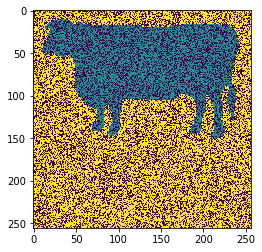

In [23]:
plt.imshow(y1.reshape(m,n))

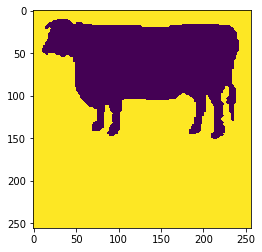

In [24]:
plt.imshow(y_list[idx].reshape(m,n))

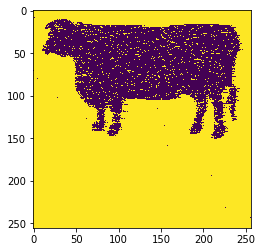

In [27]:
plt.imshow(y_.cpu().reshape(m,n))